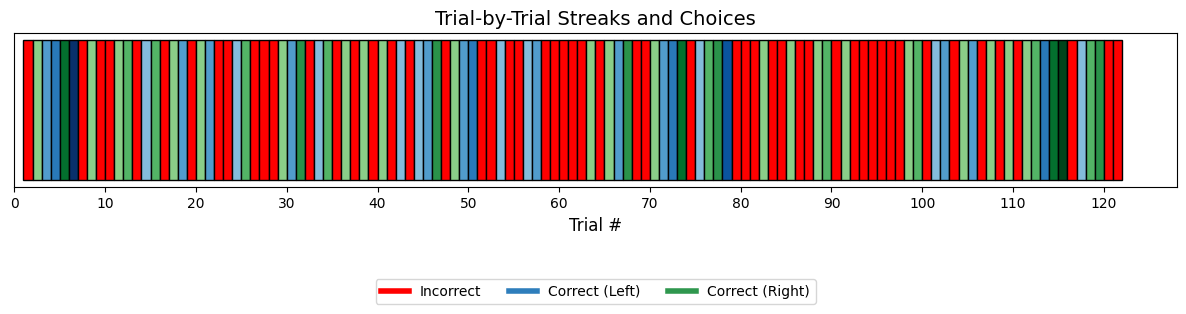

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# 내가 작업한 data cleaning 한 processed data 불러오기. 
file_path = '/Users/saeyi/Desktop/processed_data.csv'
processed_data = pd.read_csv(file_path)

# 'Trial' and 'Success' columns 가 현재 boolean 이기에 확실히 numeric 으로 바꿔주기
processed_data['Trial'] = pd.to_numeric(processed_data['Trial'], errors='coerce')
processed_data['Success'] = pd.to_numeric(processed_data['Success'], errors='coerce')

# getting 마지막 row info to know 정답 유무/left right choice
last_rows = processed_data.groupby('Trial').last()

streak_lengths = []
streak_count = 0
for success in last_rows['Success']:
    if success == 1:
        streak_count += 1
        streak_lengths.append(streak_count)
    else:
        streak_count = 0
        streak_lengths.append(0)

last_rows['Streak'] = streak_lengths

# 쥐가 left 를 골랐는지 right 를 골랐는지. 혹시 모르니 else case for unknown 도 넣어주기. 
last_rows['Direction'] = last_rows.apply(
    lambda row: 'Left' if row['LickLeft'] else 
                ('Right' if row['LickRight'] else 'Unknown'),
    axis=1
)

def get_color(c, s, d):
    # 빨간색: Incorrect trial
    if c != 1:
        return 'red'  # Incorrect trial
    # 파란색: correct & left
    elif d == 'Left':
        return plt.cm.Blues(0.3 + 0.7 * (s / max(last_rows['Streak'])))  
    # 초록색: correct & right
    elif d == 'Right':
        return plt.cm.Greens(0.3 + 0.7 * (s / max(last_rows['Streak'])))  
    return 'gray'  # Unknown case 를 위한 것. 

# heatmap 사용하기 
heatmap_colors = [
    get_color(c, s, d) for c, s, d in zip(last_rows['Success'], last_rows['Streak'], last_rows['Direction'])
]

plt.figure(figsize=(15, 2))
plt.barh([0] * len(last_rows), width=1, left=last_rows.index, color=heatmap_colors, edgecolor='black', height=0.5)

plt.title('Trial-by-Trial Streaks and Choices', fontsize=14)
plt.xlabel('Trial #', fontsize=12)
plt.yticks([])
plt.xticks(range(0, len(last_rows) + 1, 10))

# legend 에 각 색상과 정답유무 정보 마크!
legend_elements = [
    plt.Line2D([0], [0], color='red', lw=4, label='Incorrect'),
    plt.Line2D([0], [0], color=plt.cm.Blues(0.7), lw=4, label='Correct (Left)'),
    plt.Line2D([0], [0], color=plt.cm.Greens(0.7), lw=4, label='Correct (Right)')
]

# 원래대로 legend 하니 heatmap 과 overlap 되기에 아래쪽에 배치함. 
plt.legend(
    handles=legend_elements,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.55), 
    ncol=3, 
    fontsize=10
)
plt.show()
